## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

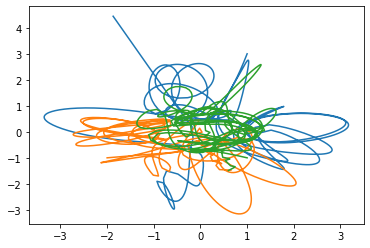

In [25]:
#credits: help from sujinna

m = [3,4,5]
y0 = [1,3,-2,-1,1,-1,0,0,0,0,0,0]



G = 4*(np.pi)**2
N = len(m)
    
def aj(mj, ri, rj, equal):
    if equal:
        return np.zeros(2)
    difference = ri-rj
    distance = np.linalg.norm(difference)**3
    return -G * mj * (difference/distance)

def rhs(y,t):
    points = np.reshape(y[:6],(3,2))
    velocity = y[6:]
    result = []
    for i in range(N):
        acc = [0,0]
        for j in range(N):
            acc += aj(m[j],points[i],points[j],i==j)
        result.extend((acc[0],acc[1]))
        
    #return f' + f'' (result)
    return np.concatenate((velocity,result)) 



t = np.linspace(0,10,1000)
solution = odeint(rhs,y0,t)
for i in range(N):
    plt.plot(solution[:,2*i],solution[:,2*i+1])
plt.show()

In [ ]:
t = np.linspace(0,100,1000)
solution = odeint(rhs,y0,t)
for i in range(N):
    plt.plot(solution[:,2*i],solution[:,2*i+1])
plt.show()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

In [4]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

#given
l1 = 2
l2 = 1
m1 = 2
m2 = 1
g = 9.8

#initial condition at t = 0
y_initial = [1.5,0,3.0,0] #[O1,O1.,O2,O2.]

t = np.arange(0,10.0,0.005)
t2 = np.arange(0,100.0,0.005)


def rhs(y,t):
    a = [[(m1+m2)*l1, m2*l2*np.cos(y[0]-y[2])], [m2*l1*np.cos(y[0]-y[2]), m2*l2]]
    
    
    b = [[-m2*l2*(y[3]**2)*np.sin(y[0]-y[2])-(m1+m2)*g*np.sin(y[0])],
         [m2*l1*(y[1]**2)*np.sin(y[0]-y[2])-m2*g*np.sin(y[2])]]
    
    
    
    c = np.linalg.solve(a,b)
    
    return [y[1],c[0],y[3],c[1]]







No handles with labels found to put in legend.


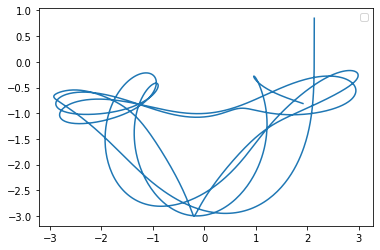

In [14]:
# t = np.arange(0,10.0,0.005)

y2 = odeint(rhs,y_initial, t)

x1 = np.sin(y2[:,0])*l1
y1 = -(np.cos(y2[:,0])*l1)
x2 = (np.sin(y2[:,2])*l2) + x1
y2 = -(np.cos(y2[:,2])*l2) + y1


plt.plot(x2,y2)
plt.legend()

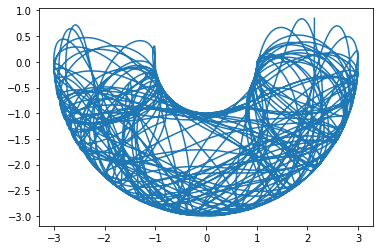

In [16]:
y2 = odeint(rhs,y_initial, t2)

x1 = np.sin(y2[:,0])*l1
y1 = -(np.cos(y2[:,0])*l1)
x2 = (np.sin(y2[:,2])*l2) + x1
y2 = -(np.cos(y2[:,2])*l2) + y1


plt.plot(x2,y2)